긍1.wav
긍10.wav
긍2.wav
긍3.wav
긍4.wav
긍5.wav
긍6.wav
긍7.wav
긍8.wav
긍9.wav
부1.wav
부10.wav
부2.wav
부3.wav
부4.wav
부5.wav
부6.wav
부7.wav
부8.wav
부9.wav
긍6001.wav
긍6002.wav
긍6003.wav
긍6004.wav
긍6005.wav
부6001.wav
부6002.wav
부6003.wav
부6004.wav
부6005.wav
train_mfccs: (20, 100, 700)
train_y: (20, 2)
test_mfccs: (10, 100, 700)
test_y: (10, 2)
train X shape: (20, 100, 700, 1)
test X shape: (10, 100, 700, 1)
Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 20.9352 - accuracy: 0.3000 - val_loss: 22.3444 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 1s 487ms/step - loss: 25.0989 - accuracy: 0.5000 - val_loss: 26.1955 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 1s 498ms/step - loss: 15.8601 - accuracy: 0.5000 - val_loss: 8.9379 - val_accuracy: 0.4000
Epoch 4/10
2/2 [==============================] - 1s 460ms/step - loss: 4.0468 - accuracy: 0.8000 - val_loss: 20.3374 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==========================

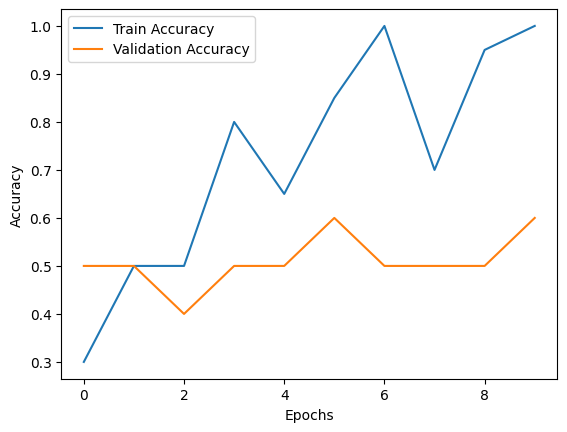

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from keras.models import load_model

import numpy as np
import librosa
import sklearn
import matplotlib.pyplot as plt
import speech_recognition as VTT
import os
import sys

from VoiceToEmotion import pad2d

In [2]:
DATA_DIR = 'Data/Sample'

In [4]:
#Audio = 원본 통화녹음 파일 Data/Sample/Sample1.wav

audio, sr = librosa.load(DATA_DIR + '/Sample1.wav', sr=None)
print('sr : ', sr)
print('wav shape : ', audio.shape)
print('length : ', audio.shape[0]/float(sr), 'secs')

sr :  48000
wav shape :  (252720,)
length :  5.265 secs


In [6]:
mfcc = librosa.feature.mfcc(y = audio, sr=sr, n_mfcc=100, n_fft=400, hop_length=160)

In [7]:
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)

In [8]:
padded_mfcc = pad2d(mfcc, 700)

In [9]:
padded_mfcc = np.expand_dims(padded_mfcc, 0)

In [10]:
np.shape(padded_mfcc)

(1, 100, 700)

In [11]:
model = load_model('weight.h5')
VTE_result = model.predict(padded_mfcc)

1/1 [==============================] - 0s 196ms/step


In [13]:
VTE_result

array([[0.9997571, 0.9709723]], dtype=float32)

In [14]:
r = VTT.Recognizer()
kr_audio = VTT.AudioFile('Data/Sample/Sample1.wav')

In [15]:
name = 0

In [16]:
with kr_audio as source:
    VTT_audio = r.record(source)

In [17]:
temp = r.recognize_google(VTT_audio, language='ko-KR')

result2:
{   'alternative': [   {   'confidence': 0.82105625,
                           'transcript': '얼굴은 화끈 화끈 하고 가슴이 무서워 하는 사람처럼 뛰어 '
                                         '놀았습니다'},
                       {'transcript': '얼굴은 화끈 화끈 하고 가슴이 무서워하는 사람처럼 뛰어 놀았습니다'},
                       {'transcript': '얼굴은 화끈화끈 하고 가슴이 무서워 하는 사람처럼 뛰어 놀았습니다'},
                       {'transcript': '얼굴은 화끈화끈 하고 가슴이 무서워하는 사람처럼 뛰어 놀았습니다'},
                       {'transcript': '얼굴은 화끈 화끈 하고 가슴이 무서워 하는 사람처럼 띠 놀았습니다'}],
    'final': True}


In [ ]:
sys.stdout = open(name + '.txt', 'w')
print(temp)
sys.stdout.close()

In [ ]:
name = name + 1